In [0]:
import librosa

!wget https://s3-ap-southeast-1.amazonaws.com/malaya-dataset/speech-bahasa.zip

--2020-01-18 02:33:20--  https://s3-ap-southeast-1.amazonaws.com/malaya-dataset/speech-bahasa.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.36.203
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.36.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289683081 (276M) [application/zip]
Saving to: ‘speech-bahasa.zip’

speech-bahasa.zip   100%[===================>] 276.26M  10.6MB/s    in 29s     

2020-01-18 02:33:50 (9.56 MB/s) - ‘speech-bahasa.zip’ saved [289683081/289683081]



In [0]:
!unzip speech-bahasa.zip
!ls

Archive:  speech-bahasa.zip
   creating: tolong-sebut/
  inflating: tolong-sebut/mata air.wav  
   creating: __MACOSX/
   creating: __MACOSX/tolong-sebut/
  inflating: __MACOSX/tolong-sebut/._mata air.wav  
  inflating: tolong-sebut/kebolehpercayaan semula.wav  
  inflating: __MACOSX/tolong-sebut/._kebolehpercayaan semula.wav  
  inflating: tolong-sebut/keterukan.wav  
  inflating: __MACOSX/tolong-sebut/._keterukan.wav  
  inflating: tolong-sebut/komisar.wav  
  inflating: __MACOSX/tolong-sebut/._komisar.wav  
  inflating: tolong-sebut/lambang.wav  
  inflating: __MACOSX/tolong-sebut/._lambang.wav  
  inflating: tolong-sebut/hias.wav   
  inflating: __MACOSX/tolong-sebut/._hias.wav  
  inflating: tolong-sebut/guru sekolah.wav  
  inflating: __MACOSX/tolong-sebut/._guru sekolah.wav  
  inflating: tolong-sebut/berkecai.wav  
  inflating: __MACOSX/tolong-sebut/._berkecai.wav  
  inflating: tolong-sebut/antipapacy.wav  
  inflating: __MACOSX/tolong-sebut/._antipapacy.wav  
  inflating: tol

In [0]:
import IPython.display as ipd
ipd.Audio('sebut-perkataan-woman/Ketua pelayan.wav')

In [0]:
ipd.Audio('tolong-sebut/abear.wav')

In [0]:
mas_sound = 'sebut-perkataan-woman/Ketua pelayan.wav'
w, sr = librosa.load(mas_sound)

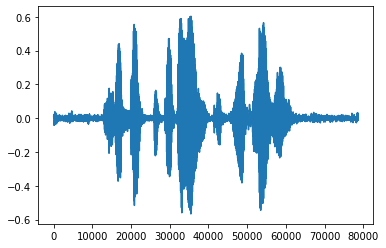

In [0]:
import matplotlib.pyplot as plt
plt.plot(w)

In [0]:
fft_mas = librosa.stft(w)
fft_mas.shape

(1025, 154)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


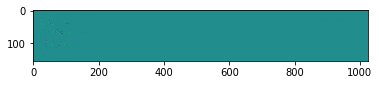

In [0]:
plt.imshow(fft_mas.astype('float32').T)

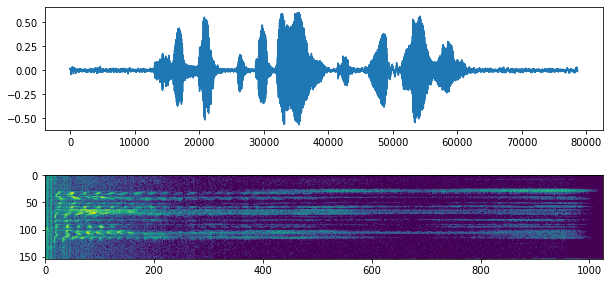

In [0]:
X = librosa.stft(w)
Xdb = librosa.amplitude_to_db(abs(X)) # abs(stft) * 10 log 10
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(w)
plt.subplot(2, 1, 2)
plt.imshow(Xdb.T)

Text(0.5, 1.0, 'mel scale')

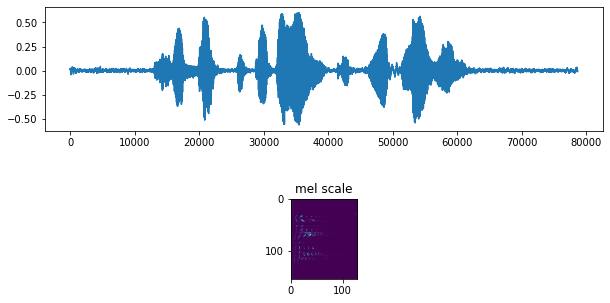

In [0]:
mel_mas = librosa.feature.melspectrogram(S = abs(X))
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(w)
plt.subplot(2, 1, 2)
plt.imshow(Xdb.T)
plt.title('db scale')
plt.subplot(3, 1, 3)
plt.imshow(mel_mas.T)
plt.title('mel scale')

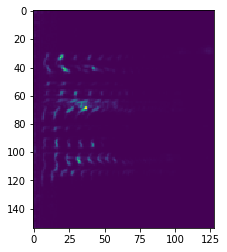

In [0]:
plt.imshow(mel_mas.T)

In [0]:
!wget https://s3-ap-southeast-1.amazonaws.com/malaya-dataset/speech-bahasa.zip
!unzip -q speech-bahasa.zip

--2020-01-18 04:09:36--  https://s3-ap-southeast-1.amazonaws.com/malaya-dataset/speech-bahasa.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.124.54
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.124.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289683081 (276M) [application/zip]
Saving to: ‘speech-bahasa.zip.2’

speech-bahasa.zip.2 100%[===================>] 276.26M  10.4MB/s    in 40s     

2020-01-18 04:10:18 (6.83 MB/s) - ‘speech-bahasa.zip.2’ saved [289683081/289683081]

replace tolong-sebut/mata air.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
from glob import glob

In [0]:
sebut_perkataan_man = glob('sebut-perkataan-man/*.wav')
len(sebut_perkataan_man)

698

In [0]:
string = sebut_perkataan_man[0]
strings = string.split('/')
left_string = ' '.join(strings[0].split('-')[:-1])
right_string = strings[1].replace('.wav', '')
first_label = left_string + ' ' + right_string

In [0]:
import IPython.display as ipd
print(first_label)
ipd.Audio(sebut_perkataan_man[0])

sebut perkataan aklamasi


In [0]:
def get_label(string):
  strings = string.split('/')
  left_string = ' '.join(strings[0].split('-')[:-1])
  right_string = strings[1].replace('.wav', '')
  return left_string + ' ' + right_string

In [0]:
labels = [get_label(s) for s in sebut_perkataan_man]
labels[:10]

['sebut perkataan aklamasi',
 'sebut perkataan pelajar',
 'sebut perkataan belajar',
 'sebut perkataan ali',
 'sebut perkataan ambak',
 'sebut perkataan adan',
 'sebut perkataan alaf',
 'sebut perkataan agung',
 'sebut perkataan alergi',
 'sebut perkataan peradaban']

In [0]:
!pip3 install youtokentome

     |████████████████████████████████| 1.7MB 9.3MB/s 


In [0]:
with open('word-corpus.txt')